In [1]:
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()

In [2]:
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

# dataset info

In [3]:
bc.target[0]

0

In [4]:
bc.target.shape

(569,)

In [5]:
bc.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [6]:
bc.data.shape

(569, 30)

# Preprocessing

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(bc.data, bc.target, test_size=0.2)

In [8]:
print(f'Features train: {x_train.shape} - test: {x_test.shape}')
print(f'Lable => train: {y_train.shape} - test: {y_test.shape}')

Features train: (455, 30) - test: (114, 30)
Lable => train: (455,) - test: (114,)


# Normalization

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Classification

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def metrics(y_train, y_test, y_pred_train, y_pred_test):
    acc_train = accuracy_score(y_true=y_train,y_pred=y_pred_train)
    acc_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)

    p = precision_score(y_true=y_test, y_pred=y_pred_test)
    r = recall_score(y_true=y_test, y_pred=y_pred_test)

    print(f'acc_train = {acc_train * 100} \n acc_test = {acc_test * 100} \n percision = {p * 100} \n recall = {r * 100} \n')
    
    return acc_test, acc_train, p, r


## 1. Naive bayes

In [11]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)


GaussianNB()

In [12]:
y_pred_train = gnb.predict(x_train)
y_pred_test = gnb.predict(x_test)

acc_train_gnb, acc_test_gnb, p_gnb, r_gnb = metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train = 93.18681318681318 
 acc_test = 96.49122807017544 
 percision = 98.64864864864865 
 recall = 96.05263157894737 



## 2. KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree', leaf_size=28)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=28, n_neighbors=8)

In [15]:
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

acc_train_knn, acc_test_knn, p_knn, r_knn = metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train = 97.58241758241758 
 acc_test = 97.36842105263158 
 percision = 98.66666666666667 
 recall = 97.36842105263158 



## 3. decision tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=256, min_samples_split=2, criterion='entropy')
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=256)

In [24]:
y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

acc_train_dt, acc_test_dt, p_dt, r_dt = metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train = 100.0 
 acc_test = 92.98245614035088 
 percision = 97.22222222222221 
 recall = 92.10526315789474 



## 4. ranom forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, max_depth=64, min_samples_split=2)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=64, n_estimators=1000)

In [30]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

acc_train_rf, acc_test_rf, p_rf, r_rf = metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train = 100.0 
 acc_test = 96.49122807017544 
 percision = 98.64864864864865 
 recall = 96.05263157894737 



## 5. SVM

In [33]:
from sklearn.svm import SVC

svm = SVC(kernel='poly')
svm.fit(x_train,y_train)

SVC(kernel='poly')

In [34]:
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)

acc_train_svm, acc_test_svm, p_svm, r_svm = metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train = 98.02197802197801 
 acc_test = 99.12280701754386 
 percision = 98.7012987012987 
 recall = 100.0 



## 6. logetic regression

In [35]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [36]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

acc_train_lr, acc_test_lr, p_lr, r_lr = metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train = 96.48351648351648 
 acc_test = 99.12280701754386 
 percision = 98.7012987012987 
 recall = 100.0 



## 7. ANN

In [39]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(hidden_layer_sizes=1024, activation='tanh', solver='lbfgs')
ann.fit(x_train,y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=1024, solver='lbfgs')

In [40]:
y_pred_train = ann.predict(x_train)
y_pred_test = ann.predict(x_test)

acc_train_ann, acc_test_ann, p_ann, r_ann = metrics(y_train, y_test, y_pred_train, y_pred_test)

acc_train = 100.0 
 acc_test = 94.73684210526315 
 percision = 100.0 
 recall = 92.10526315789474 



# Comparison

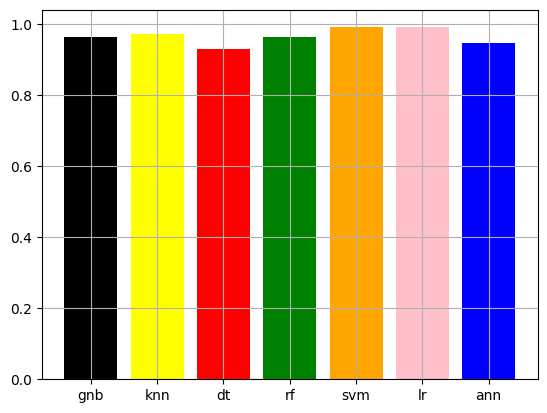

In [43]:
import matplotlib.pyplot as plt
acc_train = [acc_train_gnb,acc_train_knn,acc_train_dt,acc_train_rf,acc_train_svm,acc_train_lr,acc_train_ann]
title = ['gnb', 'knn', 'dt', 'rf', 'svm', 'lr', 'ann']
colors = ['black', 'yellow', 'red', 'green', 'orange', 'pink', 'blue']

plt.bar(title, acc_train, color=colors)
plt.grid()
plt.show()

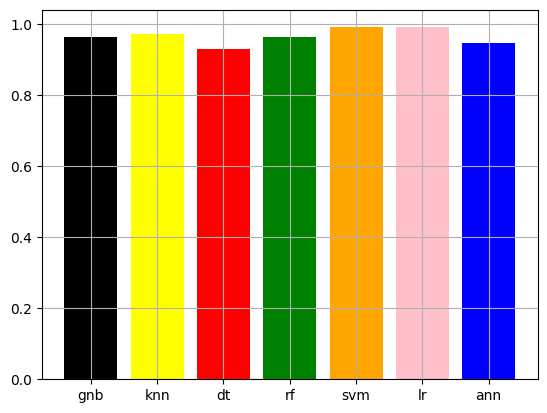

In [44]:
acc_test = [acc_test_gnb,acc_test_knn,acc_test_dt,acc_test_rf,acc_test_svm,acc_test_lr,acc_test_ann]
title = ['gnb', 'knn', 'dt', 'rf', 'svm', 'lr', 'ann']
colors = ['black', 'yellow', 'red', 'green', 'orange', 'pink', 'blue']

plt.bar(title, acc_trin, color=colors)
plt.grid()
plt.show()

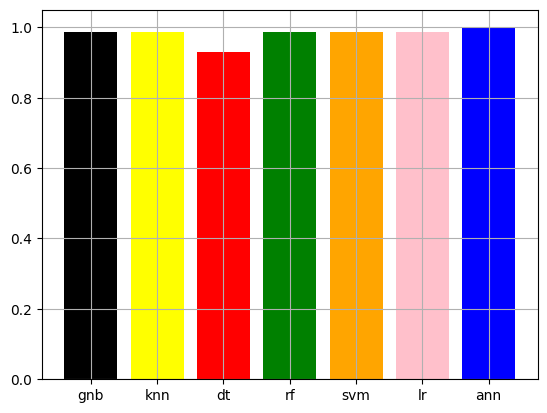

In [45]:
p = [p_gnb,p_knn,acc_train_dt,p_rf,p_svm,p_lr,p_ann]
title = ['gnb', 'knn', 'dt', 'rf', 'svm', 'lr', 'ann']
colors = ['black', 'yellow', 'red', 'green', 'orange', 'pink', 'blue']

plt.bar(title, p, color=colors)
plt.grid()
plt.show()

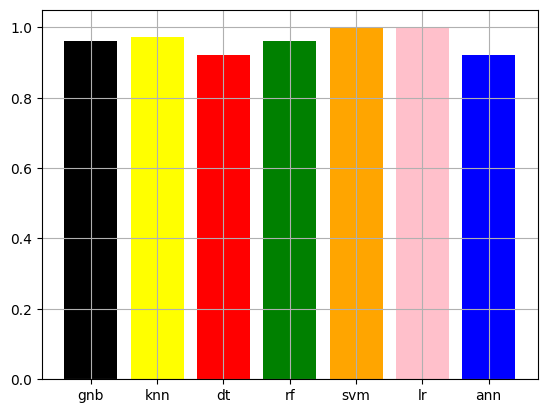

In [46]:
r = [r_gnb,r_knn,r_dt,r_rf,r_svm,r_lr,r_ann]
title = ['gnb', 'knn', 'dt', 'rf', 'svm', 'lr', 'ann']
colors = ['black', 'yellow', 'red', 'green', 'orange', 'pink', 'blue']

plt.bar(title, r, color=colors)
plt.grid()
plt.show()